In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Perceptron()
model.fit(X_train, y_train)

with open('perceptron.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 84.78% (0.8477576646650866)
Top 20 features:
                feature       weight
109  global_alarm_count  7418.000000
110     events_last_24h  6108.000000
4           hour_precip   312.577000
3             hour_temp   101.500000
108           dvornikov    74.150583
24              nuclear    32.069602
16                  lym    24.924936
15                  men    22.775609
14                   ir    18.087872
83                 spac    15.720130
55                lapin    13.108898
48                 mdco    11.629137
9               siversk     8.632761
86             kupyansk     7.956008
39                 crit     7.337275
11               svatov     3.559769
84                 foot     2.136527
102            passport     2.022713
82                soled    -0.025782
46               prison    -0.474013


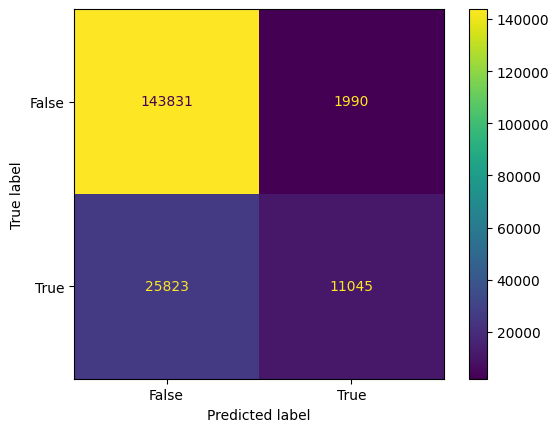

In [13]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()